### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### Loading and Modifying Data

In [33]:
# Read the CSV files with low_memory=False
df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', on_bad_lines='skip', low_memory=False)
df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip', low_memory=False)
df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip', low_memory=False)
df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip', low_memory=False)

# Combine all DataFrames into a single DataFrame
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the combined DataFrame
print(df.head())


   Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   

                 Block  IUCR                Primary Type  \
0    082XX S COLES AVE  0840                       THEFT   
1      004XX W 42ND PL  2825               OTHER OFFENSE   
2  025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST  0840                       THEFT   
4   111XX S NORMAL AVE  0841                       THEFT   

                      Description Location Description  Arrest  ...  Ward  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   7.0   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False  ...  11.0   
2   AGG CRIM SEX ABUSE FAM MEMBER  

In [3]:
df.shape

(7941282, 23)

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
# Drop the column 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,7.941282e+06,7.941282e+06,7.941191e+06,7.241058e+06,7.239191e+06,7.835709e+06,7.941282e+06,7.835708e+06
mean,5.926071e+06,1.197659e+03,1.131215e+01,2.262089e+01,3.774790e+01,1.164455e+06,2.007672e+03,-8.767203e+01
std,2.568290e+06,7.041944e+02,6.944523e+00,1.378632e+01,2.156597e+01,1.751911e+04,4.123451e+00,6.328715e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.178983e+01,-9.168657e+01
25%,3.853209e+06,6.230000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152887e+06,2.005000e+03,-8.771401e+01
50%,6.165079e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165910e+06,2.008000e+03,-8.766643e+01
75%,7.716590e+06,1.732000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176336e+06,2.010000e+03,-8.762856e+01
max,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,2.017000e+03,-8.752453e+01


### Identifying missing values

In [6]:
# Count the number of missing values per column
missing_values = df.isna().sum()

# Create a DataFrame to format the output
missing_values_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values
})

# Set 'Others' as the first row with zero missing values
missing_values_summary.loc[-1] = ['Others', 0]
missing_values_summary.index = missing_values_summary.index + 1  # Shifting index
missing_values_summary = missing_values_summary.sort_index()  # Sorting by index

# Print the summary in table format using tabulate
print("Number of Missing Values per feature:")
print(tabulate(missing_values_summary, headers='keys', tablefmt='grid', showindex=False))


Number of Missing Values per feature:
+----------------------+------------------+
| Column               |   Missing Values |
+======================+==================+
| Others               |                0 |
+----------------------+------------------+
| ID                   |                0 |
+----------------------+------------------+
| Case Number          |                7 |
+----------------------+------------------+
| Date                 |                0 |
+----------------------+------------------+
| Block                |                0 |
+----------------------+------------------+
| IUCR                 |                0 |
+----------------------+------------------+
| Primary Type         |                0 |
+----------------------+------------------+
| Description          |                0 |
+----------------------+------------------+
| Location Description |             1990 |
+----------------------+------------------+
| Arrest               |              

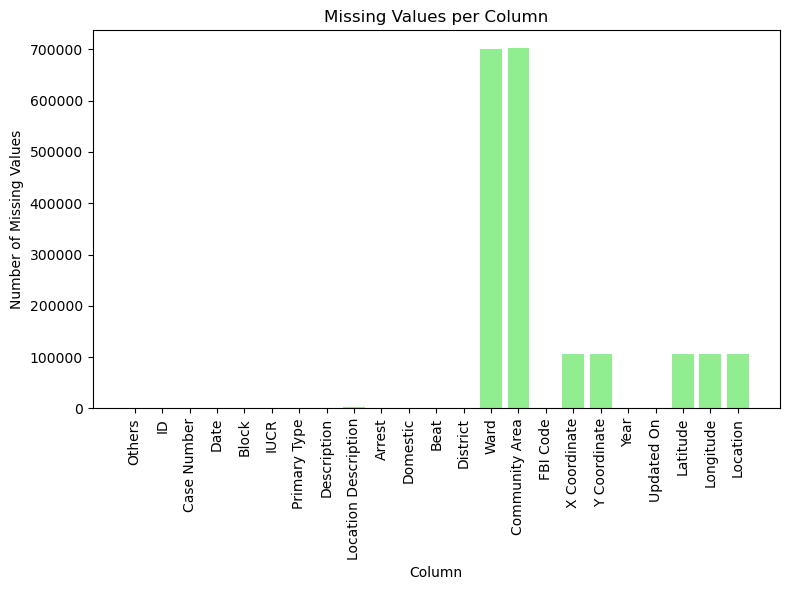

In [7]:
# Generate a bar chart to visualize missing values
plt.figure(figsize=(8, 6))
plt.bar(missing_values_summary['Column'], missing_values_summary['Missing Values'], color='lightgreen')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [8]:
#Droping missing values
df = df.dropna()

#To recheck
df.shape

(7145213, 22)

In [9]:
# Data has been retained after removal
print(round(7145213 / 7941282 * 100,2),"% of the data has been retained")

89.98 % of the data has been retained


### Most common crimes reported in Chicago

In [10]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

Primary Type
THEFT                                1476357
BATTERY                              1298239
CRIMINAL DAMAGE                       835284
NARCOTICS                             796053
OTHER OFFENSE                         440881
ASSAULT                               432898
BURGLARY                              430571
MOTOR VEHICLE THEFT                   328764
ROBBERY                               271450
DECEPTIVE PRACTICE                    247713
CRIMINAL TRESPASS                     207721
PROSTITUTION                           76768
WEAPONS VIOLATION                      70352
PUBLIC PEACE VIOLATION                 54362
OFFENSE INVOLVING CHILDREN             45568
CRIM SEXUAL ASSAULT                    25690
SEX OFFENSE                            24301
GAMBLING                               17455
LIQUOR LAW VIOLATION                   15115
INTERFERENCE WITH PUBLIC OFFICER       14993
ARSON                                  11493
HOMICIDE                                83

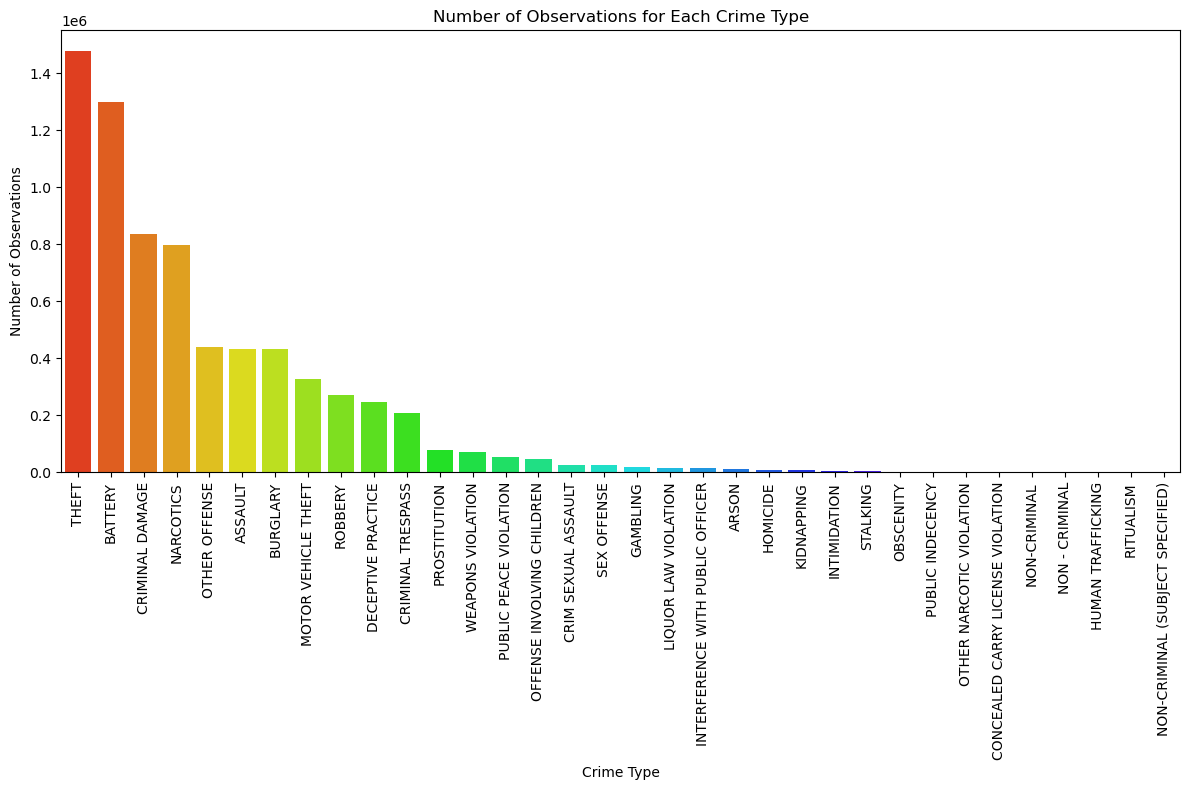

In [11]:
# Count number of observations for each crime type
crime_counts = df['Primary Type'].value_counts().reset_index()
crime_counts.columns = ['Crime Type', 'Number of Observations']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Type', y='Number of Observations', data=crime_counts, palette='hsv')
plt.xlabel('Crime Type')
plt.ylabel('Number of Observations')
plt.title('Number of Observations for Each Crime Type')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()


### Top 5 crimes in Chicago

In [12]:
# Count number of observations for each crime type
crime_counts = df['Primary Type'].value_counts()

# Identify the top 5 crime types
top_5_crimes = crime_counts.head(5)

# Print the names of the top 5 crimes
print("Top 5 Crimes:")
for i, (crime, count) in enumerate(top_5_crimes.items(), start=1):
    print(f"{i}. {crime} ({count} occurrences)")

Top 5 Crimes:
1. THEFT (1476357 occurrences)
2. BATTERY (1298239 occurrences)
3. CRIMINAL DAMAGE (835284 occurrences)
4. NARCOTICS (796053 occurrences)
5. OTHER OFFENSE (440881 occurrences)


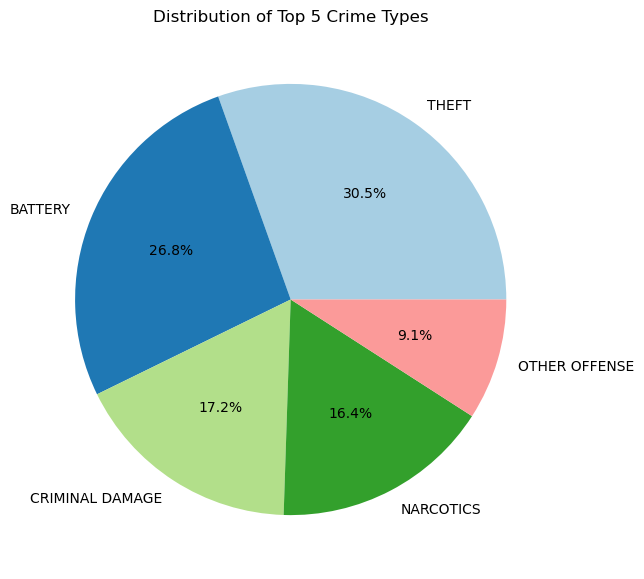

In [13]:
# Identify the top 5 crime types
top_5_crimes = crime_counts.head(5)

# Plot pie chart for the top 5 crime types
plt.figure(figsize=(10, 7))
plt.pie(top_5_crimes, labels=top_5_crimes.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(5)))
plt.title('Distribution of Top 5 Crime Types')
plt.show()

In [14]:
# creating pivot table of crime types by years
pivot_table_types_by_years = df.pivot_table(index='Year', columns='Primary Type', aggfunc='size', fill_value=0)

# calculate min, max, mean, median values for 5 most frequent types of crime
pivot_table_types_by_years[['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT']].describe()

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,86844.529412,76367.000000,49134.352941,46826.647059,25464.588235
std,49402.348525,45028.856052,31766.417322,31624.573641,14710.323675
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60613.000000,48690.000000,30189.000000,28111.000000,17925.000000
50%,75052.000000,67919.000000,39619.000000,38563.000000,22757.000000
75%,118225.000000,114927.000000,76271.000000,78281.000000,37828.000000
max,172682.000000,150844.000000,104324.000000,103284.000000,50511.000000


### Year with the most crimes reported was identified

In [15]:
# Count number of crimes per year
crime_counts_per_year = df['Year'].value_counts().sort_index()
crime_counts_per_year.index = crime_counts_per_year.index.astype(int)

print(crime_counts_per_year)

Year
2001      4695
2002    344969
2003    471138
2004    384839
2005    450570
2006    791958
2007    620304
2008    839039
2009    771183
2010    697484
2011    350669
2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
2017        30
Name: count, dtype: int64


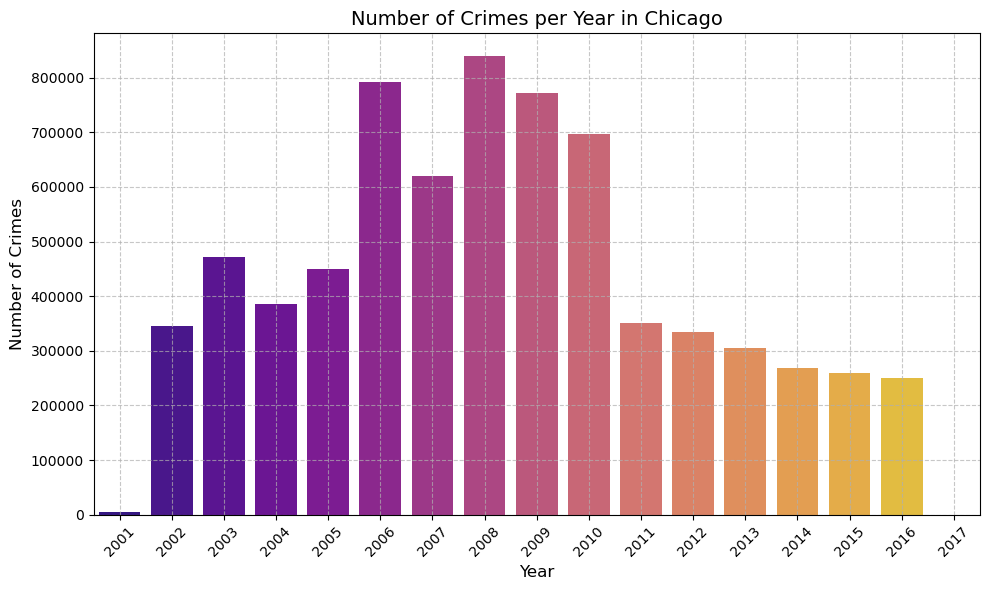

In [16]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_counts_per_year.index, y=crime_counts_per_year.values, palette='plasma')

# titles and labels
plt.title('Number of Crimes per Year in Chicago', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)  

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()


### Successful arrest rate

In [17]:
df['Arrest'] = df['Arrest'].astype(bool)

# Group by year and calculate the number of successful arrests and total crimes
arrest_summary = df.groupby('Year').agg(
    total_crimes=('Arrest', 'size'),
    successful_arrests=('Arrest', 'sum')
)

# Calculate the arrest rate as a percentage
arrest_summary['arrest_rate'] = (arrest_summary['successful_arrests'] / arrest_summary['total_crimes']) * 100

# Print the summary
print(arrest_summary[['total_crimes', 'successful_arrests', 'arrest_rate']])



        total_crimes  successful_arrests  arrest_rate
Year                                                 
2001.0          4695                1034    22.023429
2002.0        344969               96185    27.882216
2003.0        471138              140284    29.775565
2004.0        384839              116098    30.167940
2005.0        450570              140281    31.134119
2006.0        791958              242970    30.679657
2007.0        620304              189932    30.619180
2008.0        839039              215899    25.731700
2009.0        771183              217301    28.177618
2010.0        697484              190854    27.363208
2011.0        350669               96096    27.403620
2012.0        334397               90440    27.045697
2013.0        304267               86042    28.278453
2014.0        269329               78038    28.974971
2015.0        259610               68316    26.314857
2016.0        250732               48221    19.232088
2017.0            30        

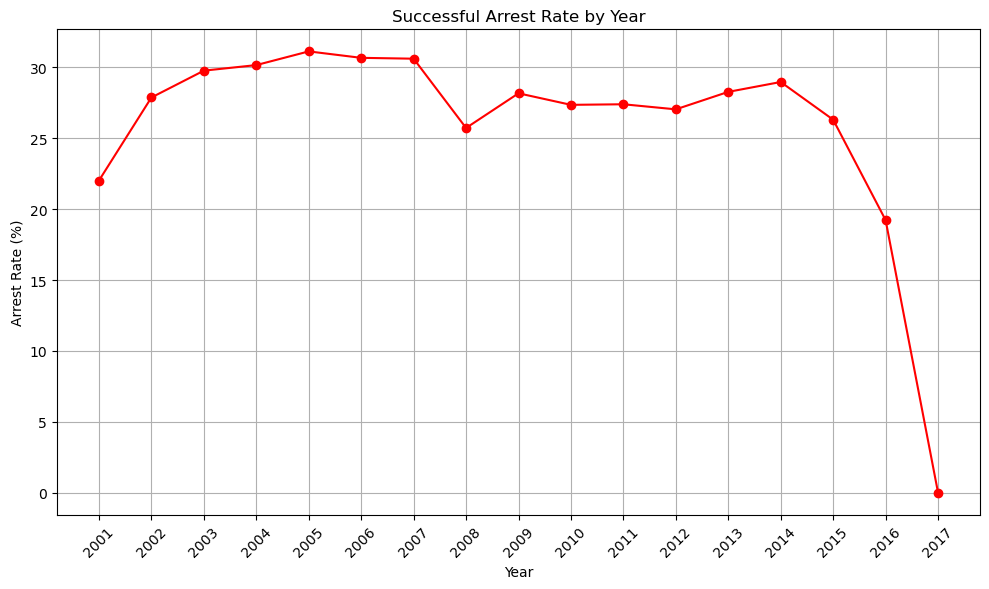

In [48]:
# Plot the arrest rate by year
plt.figure(figsize=(10, 6))
plt.plot(arrest_summary.index, arrest_summary['arrest_rate'], marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.title('Successful Arrest Rate by Year')
plt.grid(True)
plt.xticks(arrest_summary.index, rotation=45)
plt.tight_layout()
plt.show()

### Arrested vs Non Arrested

<Figure size 1200x800 with 0 Axes>

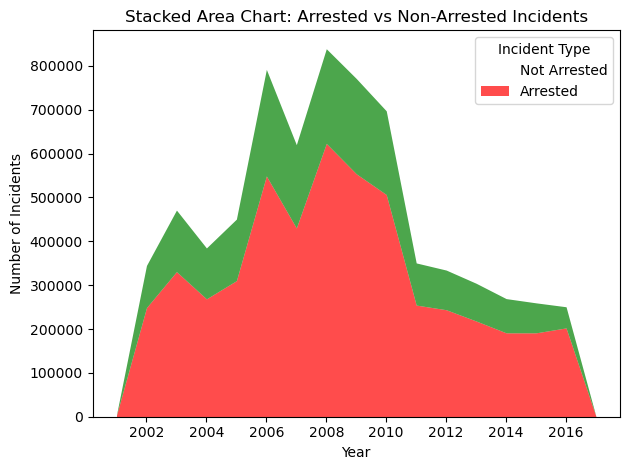

In [18]:
# Group by year and calculate the number of arrests and non-arrests
arrest_comparison = df.groupby('Year')['Arrest'].value_counts().unstack(fill_value=0)

# Plot the stacked area chart
plt.figure(figsize=(12, 8))
arrest_comparison.plot(kind='area', stacked=True, color=['red', 'green'], alpha=0.7, linewidth=0)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Stacked Area Chart: Arrested vs Non-Arrested Incidents')
plt.legend(title='Incident Type', labels=['Not Arrested', 'Arrested'])
plt.tight_layout()
plt.show()


### No. of Crimes occur in a Day

In [19]:
# Try parsing the 'Date' column without specifying a format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if 'Date' column has been converted properly
if df['Date'].isnull().all():
    print("Error: 'Date' column could not be parsed. Please check the date format or data.")
else:
    # Extract hour from the 'Date' column
    df['Hour'] = df['Date'].dt.hour

    # Check if 'Hour' column was created successfully
    if df['Hour'].isnull().all():
        print("Error: 'Hour' column is empty. There might be an issue with the 'Date' column.")
    else:
        # Count the number of crimes per hour
        crime_counts_per_hour = df['Hour'].value_counts().sort_index()

        # Check if the series is empty
        if crime_counts_per_hour.empty:
            print("No data available to plot.")
        else:
            # Identify the peak hour
            peak_hour = crime_counts_per_hour.idxmax()
            peak_hour_count = crime_counts_per_hour.max()

            # Print results
            print(f"The peak time for crimes in Chicago is {peak_hour}:00 with {peak_hour_count} crimes.")



C:\Users\Hp\AppData\Local\Temp\ipykernel_3412\3115213172.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


The peak time for crimes in Chicago is 20:00 with 408907 crimes.


C:\Users\Hp\AppData\Local\Temp\ipykernel_3412\182416383.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


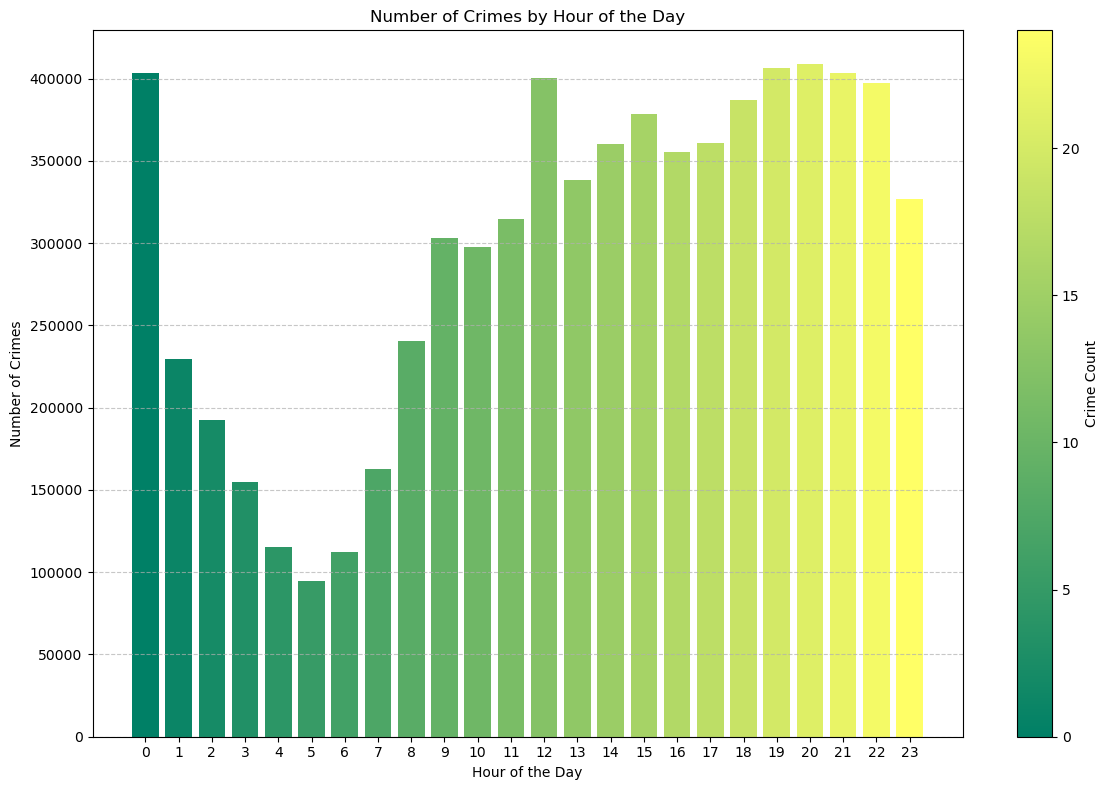

In [20]:
# Generate a gradient color for bars
colors = plt.cm.summer(np.linspace(0, 1, len(crime_counts_per_hour)))

# Plot the data
plt.figure(figsize=(12, 8))
bars = plt.bar(crime_counts_per_hour.index, crime_counts_per_hour.values, color=colors)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=0, vmax=len(crime_counts_per_hour)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Crime Count')

plt.show()


### Number of crimes by Month

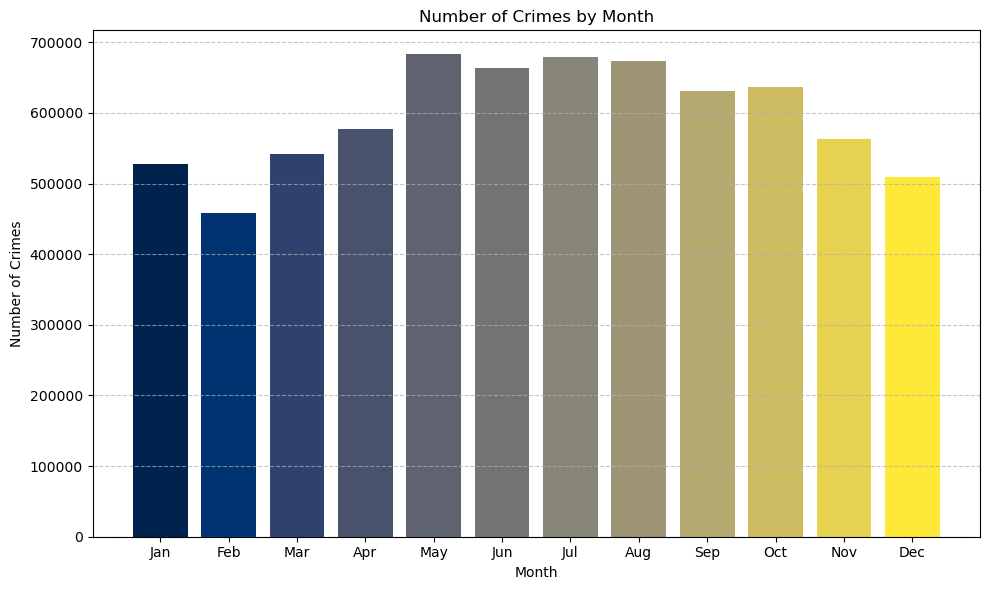

The peak month for crimes is 5 with 682764 crimes.


In [21]:

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Count the number of crimes for each month
crime_counts_per_month = df['Month'].value_counts().sort_index()

# Plot the number of crimes per month
plt.figure(figsize=(10, 6))
months = crime_counts_per_month.index
crime_counts = crime_counts_per_month.values
colors = plt.get_cmap('cividis')(np.linspace(0, 1, len(crime_counts_per_month)))

plt.bar(months, crime_counts, color=colors)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Month')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the peak month
peak_month = crime_counts_per_month.idxmax()
peak_month_count = crime_counts_per_month.max()

print(f"The peak month for crimes is {peak_month} with {peak_month_count} crimes.")


### Number of crimes per day

In [41]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract hour from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Extract weekday from the 'Date' column (0=Monday, 6=Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Map numeric weekdays to text
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['Weekday'] = df['Weekday'].map(weekday_map)

# Display the first few rows to verify the new columns
print(df[['Date', 'Hour', 'Weekday']].head())


                 Date  Hour   Weekday
0 2004-01-01 00:01:00     0  Thursday
1 2003-03-01 00:00:00     0  Saturday
2 2004-06-20 11:00:00    11    Sunday
3 2004-12-30 20:00:00    20  Thursday
4 2003-05-01 01:00:00     1  Thursday


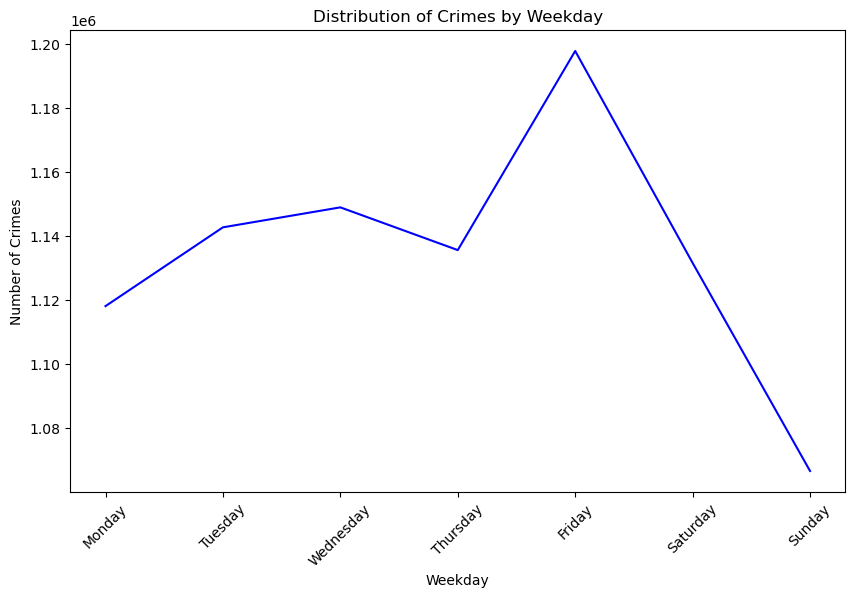

In [46]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract hour from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Extract weekday from the 'Date' column (0=Monday, 6=Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Map numeric weekdays to text
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['Weekday'] = df['Weekday'].map(weekday_map)

# Count the occurrences of each weekday
weekday_counts = df['Weekday'].value_counts().reindex(weekday_map.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', color='blue')
plt.title('Distribution of Crimes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


### Locations with most crimes

In [37]:
# Group by location and count occurrences
location_counts = df['Location Description'].value_counts()

# Show top locations with the most crimes
top_locations = location_counts.head(5)  # Top 5 locations

# Print results
print("Top 10 Locations with Most Crimes:")
print(top_locations)

Top 10 Locations with Most Crimes:
Location Description
STREET       2101842
RESIDENCE    1341749
SIDEWALK      815595
APARTMENT     812512
OTHER         294286
Name: count, dtype: int64


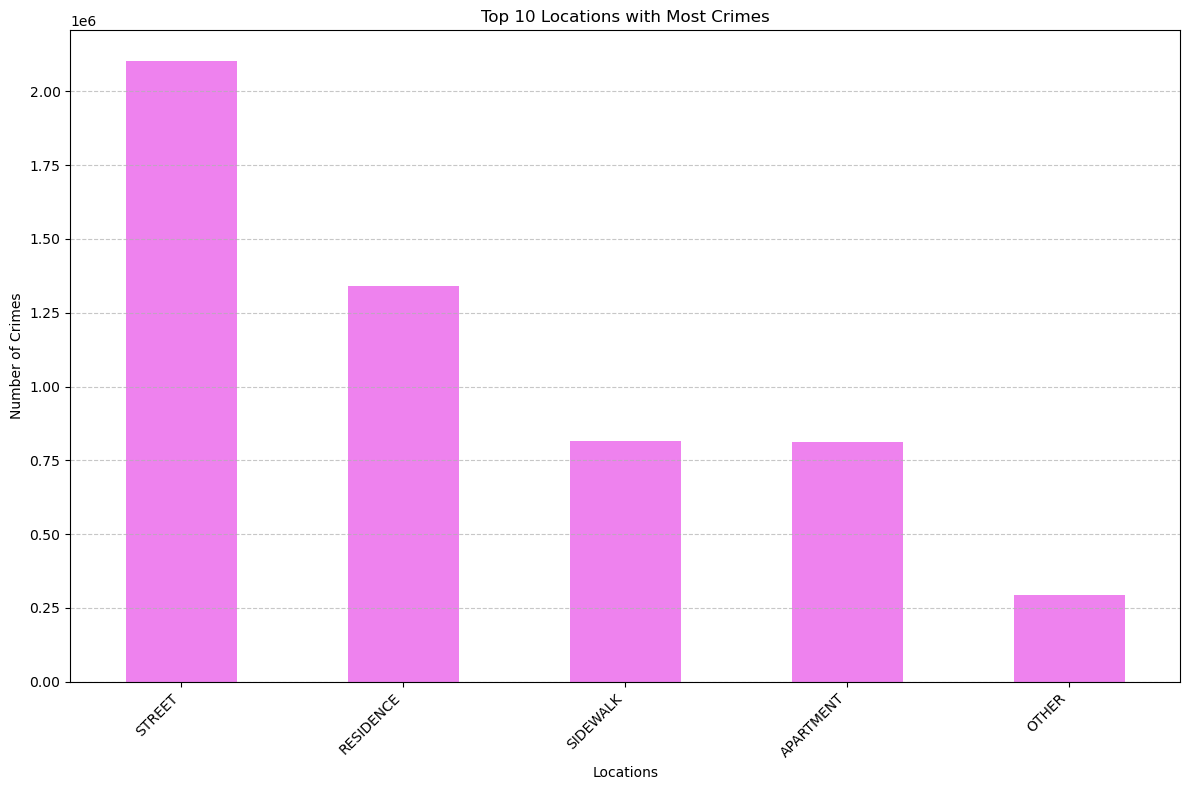

In [38]:
# Plot the results
plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar', color='violet')
plt.xlabel('Locations')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Locations with Most Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# Count the number of crimes at each location
location_counts = df['Location Description'].value_counts()

# Get the top 5 locations with the most crimes
top_5_locations = location_counts.head(5).index

# Filter the DataFrame for the top 5 locations
filtered_df = df[df['Location Description'].isin(top_5_locations)]

# Group by crime type and count occurrences in the top 5 locations
crime_counts_by_location = filtered_df.groupby('Primary Type').size()

# Calculate the average number of occurrences for each crime type
average_crime_counts = crime_counts_by_location / 5  # since we have 5 top locations

# Sort the average crime counts from high to low
sorted_average_crime_counts = average_crime_counts.sort_values(ascending=False)

# Display the results
print("Average Number of Each Crime Type in the Top 5 Locations (Sorted from High to Low):")
print(sorted_average_crime_counts)


Average Number of Each Crime Type in the Top 5 Locations (Sorted from High to Low):
Primary Type
BATTERY                              218506.8
THEFT                                171277.0
NARCOTICS                            131810.8
CRIMINAL DAMAGE                      129847.4
OTHER OFFENSE                         84017.2
ASSAULT                               65027.6
BURGLARY                              63287.4
MOTOR VEHICLE THEFT                   61940.0
ROBBERY                               40662.2
DECEPTIVE PRACTICE                    29386.8
PROSTITUTION                          16309.6
CRIMINAL TRESPASS                     14732.2
WEAPONS VIOLATION                     10418.4
OFFENSE INVOLVING CHILDREN             8975.6
PUBLIC PEACE VIOLATION                 7897.6
CRIM SEXUAL ASSAULT                    4148.0
SEX OFFENSE                            3599.0
GAMBLING                               2733.6
INTERFERENCE WITH PUBLIC OFFICER       2364.8
LIQUOR LAW VIOLATION         

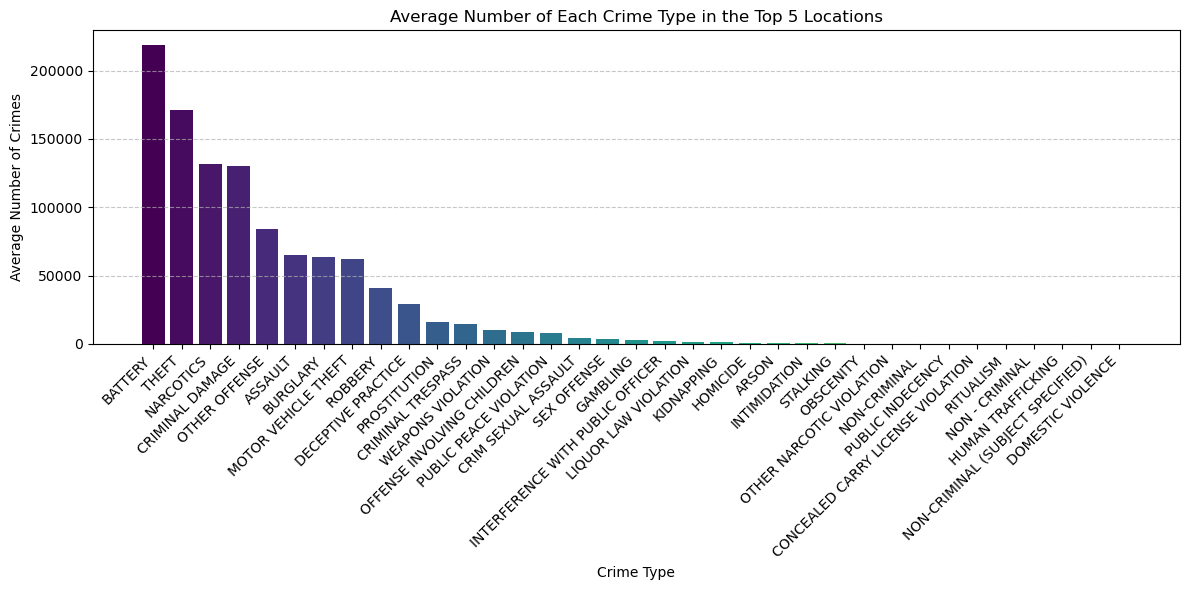

In [40]:
# Filter the DataFrame for the top 5 locations
filtered_df = df[df['Location Description'].isin(top_5_locations)]

# Group by crime type and count occurrences in the top 5 locations
crime_counts_by_location = filtered_df.groupby('Primary Type').size()

# Calculate the average number of occurrences for each crime type
average_crime_counts = crime_counts_by_location / 5  # since we have 5 top locations

# Sort the average crime counts from high to low
sorted_average_crime_counts = average_crime_counts.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
# Create a color map
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(sorted_average_crime_counts)))

plt.bar(sorted_average_crime_counts.index, sorted_average_crime_counts.values, color=colors)
plt.xlabel('Crime Type')
plt.ylabel('Average Number of Crimes')
plt.title('Average Number of Each Crime Type in the Top 5 Locations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
